In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as sts

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
##Explore the fields in the measurement database by looking at the first row
first_row_msrmnt = session.query(Measurement).first()
first_row_msrmnt.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fd36208ab00>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'id': 1,
 'tobs': 65.0,
 'date': '2010-01-01'}

In [11]:
#Explore the fields in the Station database by looking at the first row.
first_row_station = session.query(Station).first()
first_row_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fd36208af60>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'id': 1,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US'}

In [54]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results (8/24/2016-8/23/2017)
date_query = session.query(Measurement.date).order_by(Measurement.date.desc()).first()


date_query

('2017-08-23')

In [66]:
# Calculate the date 1 year ago from the last data point in the database
input_date=[]
for c in date_query[0]:
    input_date.append(c)

query_year=[]
for n in input_date[0:4]:
    query_year.append(n)

query_month=[]
for n in input_date[5:7]:
    query_month.append(n)

query_day=[]
for n in input_date[8:10]:
    query_day.append(n)
    


year = query_year[0]+query_year[1]+query_year[2]+query_year[3]
month= query_month[0]+query_month[1]
day=query_day[0]+query_day[1]
year = int(year)-1
query_date=str(year)+"-"+month+"-"+day
query_date

'2016-08-23'

In [67]:
# Perform a query to retrieve the data and precipitation scores
precip = session.query(Measurement.prcp,Measurement.date).filter(Measurement.date > query_date).all()
precip

[(0.08, '2016-08-24'),
 (0.08, '2016-08-25'),
 (0.0, '2016-08-26'),
 (0.0, '2016-08-27'),
 (0.01, '2016-08-28'),
 (0.0, '2016-08-29'),
 (0.0, '2016-08-30'),
 (0.13, '2016-08-31'),
 (0.0, '2016-09-01'),
 (0.0, '2016-09-02'),
 (0.0, '2016-09-03'),
 (0.03, '2016-09-04'),
 (None, '2016-09-05'),
 (None, '2016-09-06'),
 (0.05, '2016-09-07'),
 (0.0, '2016-09-08'),
 (0.03, '2016-09-09'),
 (0.0, '2016-09-10'),
 (0.05, '2016-09-11'),
 (0.0, '2016-09-12'),
 (0.02, '2016-09-13'),
 (1.32, '2016-09-14'),
 (0.42, '2016-09-15'),
 (0.06, '2016-09-16'),
 (0.05, '2016-09-17'),
 (0.0, '2016-09-18'),
 (0.0, '2016-09-19'),
 (0.0, '2016-09-20'),
 (0.0, '2016-09-21'),
 (0.02, '2016-09-22'),
 (0.0, '2016-09-23'),
 (0.0, '2016-09-24'),
 (0.0, '2016-09-25'),
 (0.06, '2016-09-26'),
 (0.02, '2016-09-27'),
 (0.0, '2016-09-28'),
 (0.0, '2016-09-29'),
 (0.0, '2016-09-30'),
 (0.0, '2016-10-01'),
 (0.0, '2016-10-02'),
 (0.0, '2016-10-03'),
 (0.0, '2016-10-04'),
 (0.0, '2016-10-05'),
 (0.0, '2016-10-06'),
 (0.0, '2016-1

In [68]:
# Create a dataframe from the query results and set the index to the date column
df = pd.DataFrame(precip, columns = ["Precipitation", "Date"])
df=df.set_index('Date')


In [69]:
# df_sorted = df.groupby('Date')
df_sorted = df.sort_values('Date')
# # df_sorted = df_sorted["Precipitation"].sum()
# df_sorted

/Users/tylerpitzer/opt/anaconda3/envs/pythondata2/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


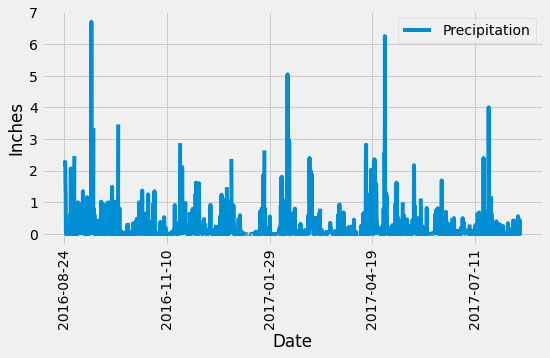

In [70]:
# Use Pandas Plotting with Matplotlib to plot the data
# """Note: what this means is to use the .plot() method on your dataframe variable,
# and then format the labels with methods like plt.xlabel() and plt.title(). 

# For example:
# df.plot()
# plt.xlabels()

# As opposed to:
# plt.bar()
# plt.xlabels()

# This is something you would never actually do. If you're importing matplotlib, you'd use
# it to generate the plot, as well as the formatting. It's good practice, if you're importing a library,
# to use it for everything you can use that library for. Every libarary you causes your program to take up
# more memory, so use what you import.
# """
#xticks =['2016-08-23','2016-10-01','2016-11-09','2016-12-19','2017-01-28','2017-03-09','2017-04-18','2017-05-31','2017-07-10']
# x_axis = np.arange(len(df['Date']))
# y_axis = df['Precipitation']
                   
df_sorted.plot(rot=90,figsize=(8,4))

plt.xlabel("Date")
plt.ylabel("Inches")

plt.show()

In [71]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation = df["Precipitation"]

count = df['Precipitation'].count()
mean_numpy = np.mean(precipitation)
median_numpy = np.median(precipitation)
mode_scipy = sts.mode(precipitation)
std_numpy = np.std(precipitation)
min_prcp = precipitation.min()
max_prcp = precipitation.max()

list(precipitation).sort()
quartiles = precipitation.quantile([.25,.50,.75])

lowerq = quartiles[.25]
upperq = quartiles[.75]
median = quartiles[.50]


print(f"count = {count}")
print(f"mean = {mean_numpy}")
print(f"std = {std_numpy}")
print(f"min {min_prcp}")
print(f"25% = {lowerq}")
print(f"50% = {median}")
print(f"75% = {upperq}")
print(f"max = {max_prcp}")

count = 2015
mean = 0.17646153846153848
std = 0.46017413403229496
min 0.0
25% = 0.0
50% = 0.02
75% = 0.13
max = 6.7


In [72]:
# Design a query to show how many stations are available in this dataset?
num_stations = session.query(Station.station).count()

print(f"Total number of stations: {num_stations}")

Total number of stations: 9


In [73]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
sel = [Measurement.station,
       func.count(Measurement.station),
       func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]
       
stations = session.query(*sel).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
                                                                   
# stations_df = pd.DataFrame(stations, columns= ["Station", "Count", "Min Obs", "Max Obs", "Avg Obs"])

# stations_df = stations_df.sort_values(by="Count", ascending=False)
# stations_df
most_active = stations[0]
print(f"The most active stations is {most_active}")

The most active stations is USC00519281


In [74]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
low_temp = stations[2]
high_temp = stations[3]
avg_temp = stations[4]

print(f"The lowest temperature recorded for station {most_active} was {low_temp}.")
print(f"The highest temperature recorded for station {most_active} was {high_temp}.")
print(f"The average temperature recorded for station {most_active} was {avg_temp}.")

The lowest temperature recorded for station USC00519281 was 54.0.
The highest temperature recorded for station USC00519281 was 85.0.
The average temperature recorded for station USC00519281 was 71.66378066378067.


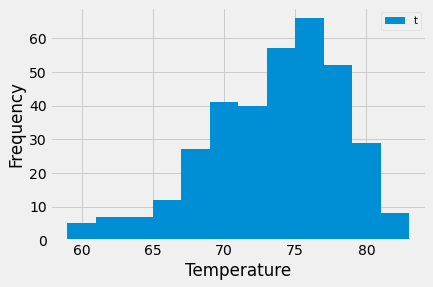

In [75]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_obs = session.query(Measurement.tobs,Measurement.date).filter(Measurement.date > query_date).filter(Measurement.station==most_active).all()
x = []
for temp in temp_obs:
    x.append(temp[0])

plt.hist(x, bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend("tobs",loc="upper right",fontsize=10)

plt.show()


## Bonus Challenge Assignment

In [76]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
